In [60]:
import numpy as np
import DeltaVar as dv
import matplotlib.pyplot as plt
import time
import pickle
import os
from tqdm import tqdm

In [61]:
L = 10**(np.linspace(-1.8,-0.6, 100))
v = 1.5

In [62]:
DATADIR = '../Data/fBmFields/2DUnexponentiated/100px/Testing/'

In [63]:
y_test = np.loadtxt(os.path.join(DATADIR,'labels/labels.txt'))

In [64]:
path = os.path.join(DATADIR,'features')
c=0
prediction = []
for img in tqdm(os.listdir(path)):
    img_array = np.loadtxt(os.path.join(path,img))
    delta_var_img = [dv.DeltaVar(img_array, l, v) for l in L]
    params = dv.HurstEstimator(delta_var_img,L)
    prediction.append(params[0])
    c+=1

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:31<00:00,  4.72it/s]


In [65]:
import NeuralNet as nn

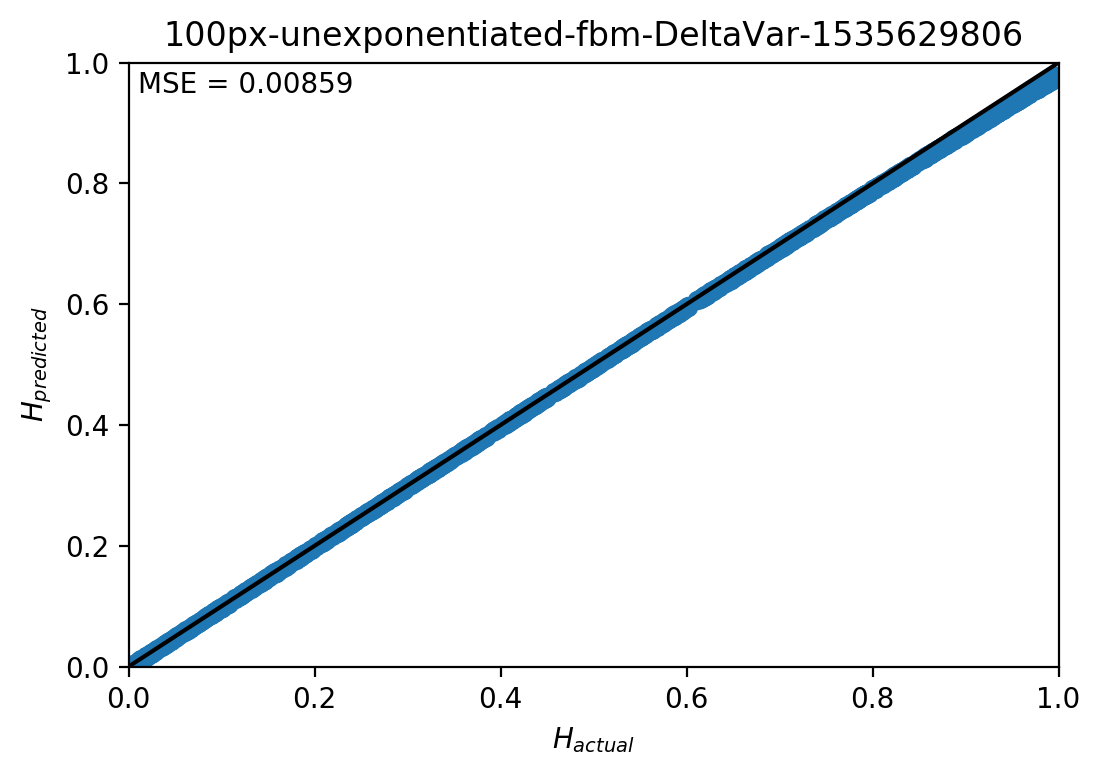

In [67]:
plt.figure(dpi=200)
plt.scatter(y_test,prediction)
plt.plot([0,1],[0,1],c='k')
plt.text(0.01, 0.95, 'MSE = '+ '{:.3g}'.format(nn.RMSE(y_test,prediction)))
plt.ylim([0,1])
plt.xlim([0,1])
plt.xlabel(r'$H_{actual}$')
plt.ylabel(r'$H_{predicted}$')
plt.title('100px-unexponentiated-fbm-DeltaVar-{}'.format(int(time.time())))
plt.savefig('../Data/fBmFields/2DUnexponentiated/100px/100px-unexponentiated-fbm-DeltaVar-{}.png'.format(int(time.time())))
plt.show()